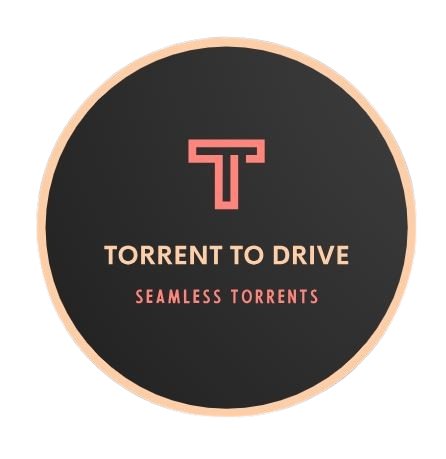

## Follow Me

If you find this project useful or have any questions, feel free to connect with me on GitHub and LinkedIn! I appreciate your feedback and contributions.

- **GitHub:** [ylp1455](https://github.com/ylp1455)
- **LinkedIn:** [Yasiru Perera](www.linkedin.com/in/yasiru-perera-a83a27236)


# Install necessary libraries

In [ ]:
!apt install python3-libtorrent

# Import necessary libraries

In [ ]:
import libtorrent as lt
import time
from google.colab import drive

# Mount Google Drive

In [ ]:
drive.mount('/content/drive')

# Function to add a torrent and download to Google Drive and Call the function

In [ ]:
def add_torrent(magnet_link, save_path):
    ses = lt.session()
    handle = lt.add_magnet_uri(ses, magnet_link, {'save_path': save_path})
    print('downloading', handle.name())
    while not handle.is_seed():
        s = handle.status()
        print('%.2f%% complete (down: %.1f kB/s up: %.1f kB/s peers: %d) %s' % (
            s.progress * 100, s.download_rate / 1000, s.upload_rate / 1000,
            s.num_peers, s.state))
        time.sleep(5)

magnet_link = input("Enter the magnet link: ")
save_path = '/content/drive/MyDrive/' + input("Enter the path where you want to save the downloaded file: ")

add_torrent(magnet_link, save_path)

In [ ]:
# First, install the necessary libraries
!apt-get install python3-libtorrent
!pip install google-colab

import libtorrent as lt
import time
import datetime
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')

# Allow user to upload a .torrent file
uploaded = files.upload()
torrent_file = list(uploaded.keys())[0]

# Read the .torrent file
with open(torrent_file, 'rb') as f:
    torrent_info = lt.torrent_info(lt.bdecode(f.read()))

# Create a session
ses = lt.session()
ses.listen_on(6881, 6891)

# Add the torrent to the session
params = {
    'save_path': '/content/drive/My Drive/TorrentDownloads/',  # Change this to your desired directory in Google Drive
    'storage_mode': lt.storage_mode_t(2),
}
handle = ses.add_torrent({'ti': torrent_info, 'save_path': params['save_path']})

print(f"Downloading {torrent_info.name()} to {params['save_path']}")

# Start downloading the torrent
while not handle.is_seed():
    s = handle.status()
    print(f"\r{datetime.datetime.now()} - {s.progress * 100:.2f}% complete (down: {s.download_rate / 1000:.1f} kB/s up: {s.upload_rate / 1000:.1f} kB/s peers: {s.num_peers})", end="")
    time.sleep(1)

print("\nDownload complete.")
